# **LetsGrowMore Vitual Internship Program(LGMVIP): Data Science Intern June 2022**
##**Task 2:- Stock Market Prediction And Forecasting Using Stacked LSTM**

# **Author:- Komal Keru Kurhe**


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset
dataset link:- https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

Data Description:-

Open: The price of the stock when the market opens in the morning

Close: The price of the stock when the market closed in the evening

High: Highest price the stock reached during that day

Low: Lowest price the stock is traded on that day

Volume: The total amount of stocks traded on that day

In [3]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
dataset=pd.read_csv(url)
dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
dataset.shape     #Number of rows and columns of data

(2035, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


Check missing values in data

In [6]:
dataset.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

NO null values present in the data.

In [7]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
df1=dataset.reset_index()['Close']

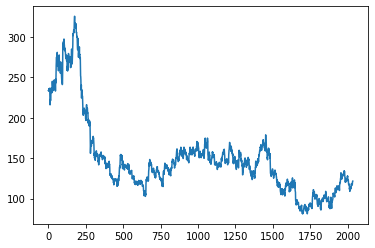

In [9]:
plt.plot(df1)

Always remember that in time-series data the one data is dependent on other data. The training size should be 65% of the total length of the data frame, the test size should be the difference between the length of the dataset and the training size.

## LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is that LSTM can store past important information and forget the information that is not.
LSTM has three gates:
* The input gate: The input gate adds information to the cell state,
* The forget gate: It removes the information that is no longer required by the model,
* The output gate: Output Gate at LSTM selects the information to be shown as output.
 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [ ]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
print(training_size)
print(test_size)
print(train_data,test_data)

1322
713
[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.25347222]
 [0.26041667]
 [0.2563317 ]] [[0.24652778]
 [0.23611111]
 [0.25204248]
 [0.25919118]
 [0.25776144]
 [0.2681781 ]
 [0.25449346]
 [0.27103758]
 [0.24530229]
 [0.26756536]
 [0.27267157]
 [0.26633987]
 [0.27410131]
 [0.28615196]
 [0.27818627]
 [0.27205882]
 [0.27124183]
 [0.27798203]
 [0.27083333]
 [0.25857843]
 [0.24285131]
 [0.2250817 ]
 [0.23447712]
 [0.24346405]
 [0.23611111]
 [0.22937092]
 [0.21527778]
 [0.20976307]
 [0.20751634]
 [0.2060866 ]
 [0.20445261]
 [0.20098039]
 [0.21180556]
 [0.19301471]
 [0.18974673]
 [0.20302288]
 [0.21752451]
 [0.20629085]
 [0.19158497]
 [0.17381536]
 [0.17401961]
 [0.18361928]
 [0.17830882]
 [0.19362745]
 [0.20098039]
 [0.20486111]
 [0.21425654]
 [0.21813725]
 [0.21466503]
 [0.21343954]
 [0.21160131]
 [0.21711601]
 [0.20710784]
 [0.2005719 ]
 [0.20874183]
 [0.18647876]
 [0.19199346]
 [0.1807598 ]
 [0.20935458]
 [0.20792484]
 [0.21425654]
 [0.23366013]
 [0.23304739]
 [0.26184641]
 [0.2

In [ ]:
# convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 15s 272ms/step - loss: 0.0282 - val_loss: 0.0047
Epoch 2/100
20/20 [==============================] - 4s 194ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 3/100
20/20 [==============================] - 4s 194ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 4s 195ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/100
20/20 [==============================] - 4s 192ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/100
20/20 [==============================] - 4s 228ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/100
20/20 [==============================] - 7s 334ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/100
20/20 [==============================] - 4s 182ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/100
20/20 [==============================] - 5s 245ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 10/100
20/20 [==============================] - 4s 195ms/step - loss: 0.0012 - val_l